In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prepoc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

#### Loading data

In [2]:
data_dir = "../data/dataset.csv"
df = pd.read_csv(data_dir)

## Data Exploration

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Attributes with null values

In [5]:
for key in df:
    n_nan = df[key].isna().sum()
    if n_nan != 0:
        print(f"{key}: {n_nan}")

Age: 177
Cabin: 687
Embarked: 2


#### Numerical attributes

In [6]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Description of numerical attributes

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Visualization of numerical attributes on a 2d plane

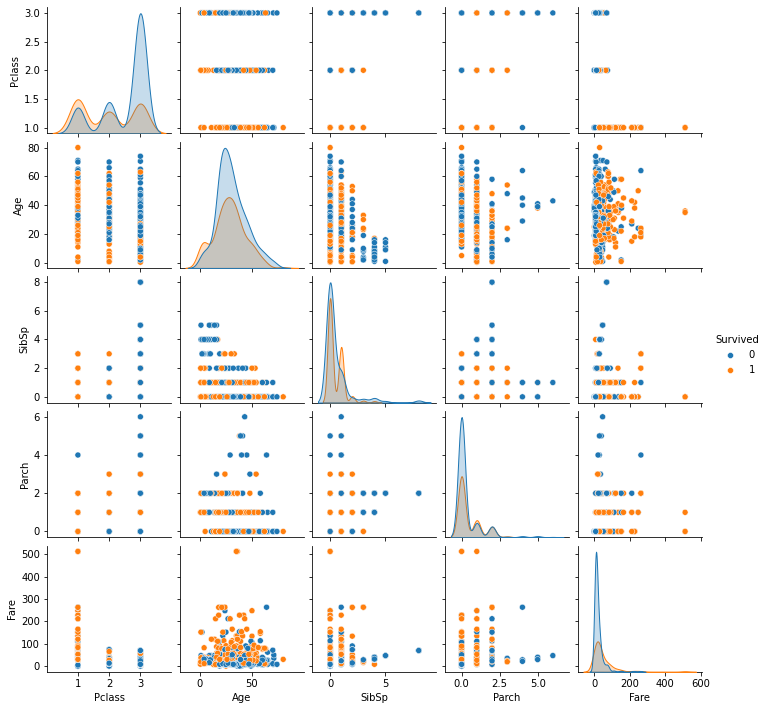

In [8]:
sns.pairplot(df.drop(columns=["PassengerId"]), hue="Survived", height=2)
plt.show()

#### Separating numerical and categorical attributes

In [9]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#### Value distributions for numerical attributes

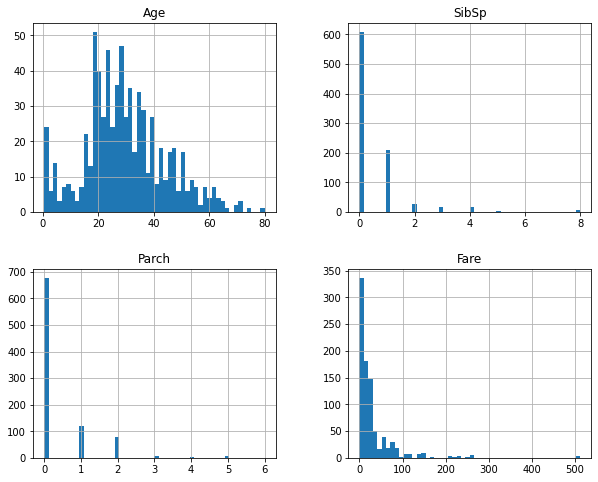

In [10]:
df_num.hist(bins=50, figsize=(10, 8))
plt.show()

#### Correlation matrix for numerical attributes

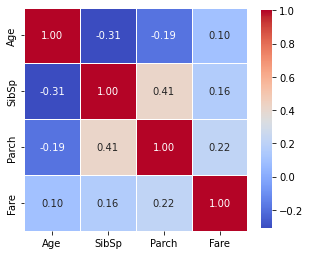

In [11]:
corr_matrix = df_num.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8}, square=True)
plt.show()

#### Value distributions for ordered categorical attributes

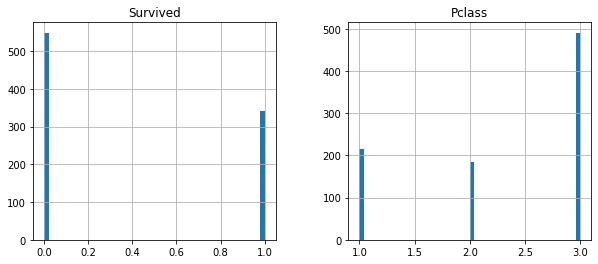

In [12]:
df_cat.hist(bins=50, figsize=(10, 4))
plt.show()

#### Looking at Embarked values

In [13]:
df_cat.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Looking at Cabin values

In [14]:
df_cat.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
print(f"Number of nans in Cabin: {df_cat.Cabin.isna().sum()}/{df_cat.Cabin.shape[0]}")

Number of nans in Cabin: 687/891


In [16]:
df_cat.Cabin.value_counts(sort=True, ascending=False)[:10]

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: Cabin, dtype: int64

#### Comparing survival rates for categorical variables

In [17]:
pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [18]:
pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [19]:
pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## Feature Engineering

#### Since most values of cabins are Nan it is good to check the survival rate relative to the lack or existance of a cabin value

In [20]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

#### Creates categories based on the cabin letter (n stands for null)

In [21]:
df['cabin_lt'] = df.Cabin.apply(lambda x: str(x)[0])

#### Creating family size feature to show how the size of the family affect the survival chance

In [22]:
df["FamilySize"] = df["Parch"] + df["SibSp"]
df["FamilySize"].value_counts().sort_values(ascending=False)

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [23]:
df["FamilySize"] = pd.cut(
    df["FamilySize"], 
    bins=[-1, 0, 3, 5, 10],
    labels=["Alone", "Small", "Medium", "Large"]
)

#### Creating numeric ticket feature to check how the digit affects the survival rate

In [24]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

## Supplemental research for engineered features

#### Looking into cabin_multiple values

In [25]:
df['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [26]:
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


#### Looking into first cabin letter values

In [27]:
df['cabin_lt'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_lt, dtype: int64

In [28]:
pd.pivot_table(df, index="Survived", columns="cabin_lt", values="Name", aggfunc="count")

cabin_lt,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


#### Looking into numeric_ticket values

In [29]:
df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [30]:
pd.pivot_table(df, index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


#### Looking into name_title values

In [31]:
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [32]:
pd.pivot_table(df, index='Survived',columns='name_title', values = 'Name', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


#### Looking into family size values

In [33]:
df["FamilySize"].value_counts().sort_values(ascending=False)

Alone     537
Small     292
Medium     37
Large      25
Name: FamilySize, dtype: int64

In [34]:
pd.pivot_table(df, index="Survived", columns="FamilySize", values="Name", aggfunc="count")

FamilySize,Alone,Small,Medium,Large
Survived,,,,
0,374,123,31,21
1,163,169,6,4


## Data processing

#### Handling attributes with null values

In [35]:
df.Age = df.Age.fillna(30)
df.Embarked = df.Embarked.fillna("S")

#### Handling text and categorical attributes

In [36]:
COLS_TO_ENCODE = ["Pclass", "Embarked", "FamilySize"]
drop_categories = [df[col].value_counts().idxmin() for col in COLS_TO_ENCODE]
encoder = OneHotEncoder(drop=drop_categories, sparse_output=False, dtype=np.int64)
encoder.fit(df[COLS_TO_ENCODE])

########### Encoding Sex separately ###########
df.loc[:, "Sex"] = df["Sex"].apply(lambda sex: 1 if sex=="male" else 0)

encoded_arr = encoder.transform(df[COLS_TO_ENCODE])
encoded_df = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(COLS_TO_ENCODE), dtype=np.int64)

########### Encoding name title separately ###########
TITLE_CATEGORIES = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
title_encoder = OneHotEncoder(categories=[TITLE_CATEGORIES], handle_unknown='ignore', sparse_output=False, dtype=np.int64)
title_encoder.fit(df[['name_title']])

title_encoded_arr = title_encoder.transform(df[['name_title']])
title_encoded_df = pd.DataFrame(title_encoded_arr, columns=title_encoder.get_feature_names_out(['name_title']), dtype=np.int64)

########### Encoding cabin letter separately ###########
LETTER_CATEGORIES = ['n']
letter_encoder = OneHotEncoder(categories=[LETTER_CATEGORIES], handle_unknown='ignore', sparse_output=False, dtype=np.int64)
letter_encoder.fit(df[['cabin_lt']])

letter_encoded_arr = letter_encoder.transform(df[['cabin_lt']])
letter_encoded_df = pd.DataFrame(letter_encoded_arr, columns=letter_encoder.get_feature_names_out(['cabin_lt']), dtype=np.int64)

df = df.drop(columns=[*COLS_TO_ENCODE, 'name_title', 'cabin_lt']).reset_index(drop=True)
df = pd.concat([df, title_encoded_df, letter_encoded_df, encoded_df], axis=1)

#### Dropping extra attributes

In [37]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Parch", "SibSp", "cabin_multiple"])

#### Numeric attribute variation before scaling

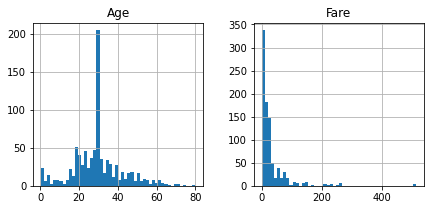

In [38]:
df[["Age", "Fare"]].hist(bins=50, figsize=(7, 3))
plt.show()

#### Scaling

In [39]:
scaler = StandardScaler()

df["Fare"] = np.log10(df["Fare"] + 1)
df["Fare"] = scaler.fit_transform(df[["Fare"]])
df["Age"] = scaler.fit_transform(df[["Age"]])

#### Numeric attribute variation after scaling

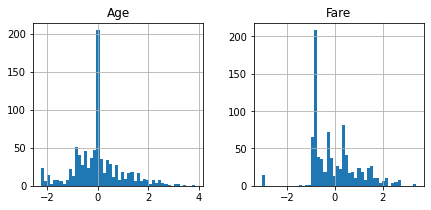

In [40]:
df[["Age", "Fare"]].hist(bins=50, figsize=(7, 3))
plt.show()

## Feature correlations

#### Correlation matrix of all attributes

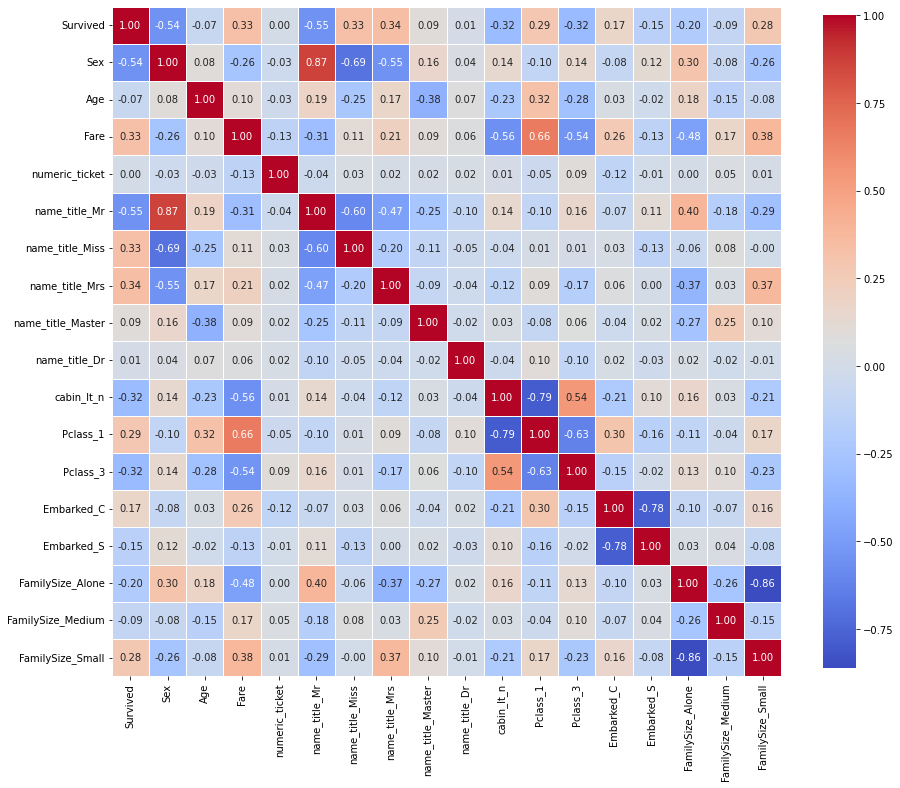

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8}, square=True)
plt.show()

#### Correlation of all attributes with survival rate

In [42]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived             1.000000
name_title_Mrs       0.339040
Fare                 0.329862
name_title_Miss      0.327093
Pclass_1             0.285904
FamilySize_Small     0.279855
Embarked_C           0.168240
name_title_Master    0.085221
name_title_Dr        0.008185
numeric_ticket       0.001492
Age                 -0.070657
FamilySize_Medium   -0.094879
Embarked_S          -0.149683
FamilySize_Alone    -0.203367
cabin_lt_n          -0.316912
Pclass_3            -0.322308
Sex                 -0.543351
name_title_Mr       -0.549199
Name: Survived, dtype: float64

## End dataset info

In [43]:
df.head()

,Survived,Sex,Age,Fare,numeric_ticket,name_title_Mr,name_title_Miss,name_title_Mrs,name_title_Master,name_title_Dr,cabin_lt_n,Pclass_1,Pclass_3,Embarked_C,Embarked_S,FamilySize_Alone,FamilySize_Medium,FamilySize_Small
0,0,1,-0.597055,-0.879741,0,1,0,0,0,0,1,0,1,0,1,0,0,1
1,1,0,0.634162,1.361220,0,0,0,1,0,0,0,1,0,1,0,0,0,1
2,1,0,-0.289251,-0.798540,0,0,1,0,0,0,1,0,1,0,1,1,0,0
3,1,0,0.403309,1.062038,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,0,1,0.403309,-0.784179,1,1,0,0,0,0,1,0,1,0,1,1,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Sex                891 non-null    int64  
 2   Age                891 non-null    float64
 3   Fare               891 non-null    float64
 4   numeric_ticket     891 non-null    int64  
 5   name_title_Mr      891 non-null    int64  
 6   name_title_Miss    891 non-null    int64  
 7   name_title_Mrs     891 non-null    int64  
 8   name_title_Master  891 non-null    int64  
 9   name_title_Dr      891 non-null    int64  
 10  cabin_lt_n         891 non-null    int64  
 11  Pclass_1           891 non-null    int64  
 12  Pclass_3           891 non-null    int64  
 13  Embarked_C         891 non-null    int64  
 14  Embarked_S         891 non-null    int64  
 15  FamilySize_Alone   891 non-null    int64  
 16  FamilySize_Medium  891 non

In [45]:
df.describe()

,Survived,Sex,Age,Fare,numeric_ticket,name_title_Mr,name_title_Miss,name_title_Mrs,name_title_Master,name_title_Dr,cabin_lt_n,Pclass_1,Pclass_3,Embarked_C,Embarked_S,FamilySize_Alone,FamilySize_Medium,FamilySize_Small
count,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,1.594933e-16,-1.265978e-16,0.741863,0.580247,0.204265,0.140292,0.044893,0.007856,0.771044,0.242424,0.551066,0.188552,0.725028,0.602694,0.041526,0.327722
std,0.486592,0.477990,1.000562e+00,1.000562e+00,0.437855,0.493796,0.403390,0.347485,0.207186,0.088337,0.420397,0.428790,0.497665,0.391372,0.446751,0.489615,0.199616,0.469646
min,0.000000,0.000000,-2.257659e+00,-3.058578e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-5.970548e-01,-8.002318e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.855376e-02,-2.316613e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,4.033091e-01,5.198636e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,3.866107e+00,3.385294e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
